***
### CAPSTONE PROJECT 3: FEATURE ENGINEERING/PRE-PROCESSING/MODELING ###
***
- Review the PCA's generated from the DATA CLEANING/EDA 
- Determine how many PCAs required
- Deterrmine if only most important Eigen values from PCAs would be sufficient to model.
- separate table into X and y sets.
- create Train and test data sets.
- scale data.
- setup ARIMA models
- setup LSTM Model
- setup VAR model.
- train models
- evaluate models.
- decide which model serves best and why.

In [64]:
# Basic Data Science Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models to test and scalar
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX



##### FEATURE ENGINEERING
***
Determine Number of PCA's Required or if only important Eigen values from PCAs would be sufficient for our model

In [65]:
bitcoin_df = pd.read_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\bitcoin_df_cleaned')
most_important_features = pd.read_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\most_important_features')

In [66]:
bitcoin_df.head()

,date,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,2009-01-03,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
1,2009-01-04,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
2,2009-01-05,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
3,2009-01-06,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
4,2009-01-07,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025


In [67]:
bitcoin_df.columns

Index(['date', 'USD Exchange Trade Volume', 'Total Transaction Fees USD',
       'Total Transaction Fees', 'Total Output Volume', 'Total Bitcoins',
       'Transaction Excluding Popular Addresses',
       'Number of Transactions per Block', 'Total Number of Transactions',
       'Number of Transactions', 'Number of Unique Addresses Used',
       'My Wallet Transaction Volume', 'My Wallet Number of Users',
       'Number of Transactions per Day', 'Market Capitalization',
       'Market Price', 'Miners Revenue', 'Hash Rate',
       'Estimated Transaction Volume USD', 'Estimated Transaction Volume',
       'Difficulty', 'Cost Percent of Transaction Volume',
       'Cost per Transaction', 'API Blockchain Size', 'Average Block Size',
       'Median Transaction Confirmation Time', 'PCA1', 'PCA2', 'PCA3', 'PCA4',
       'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12'],
      dtype='object')

In [68]:
print(most_important_features['Feature Name'])

0                             Difficulty
1                  Market Capitalization
2       Estimated Transaction Volume USD
3              USD Exchange Trade Volume
4           Total Number of Transactions
5                              Hash Rate
6              My Wallet Number of Users
7                         Miners Revenue
8              My Wallet Number of Users
9                    Total Output Volume
10            Total Transaction Fees USD
11    Cost Percent of Transaction Volume
Name: Feature Name, dtype: object


Since we're dealing with Cybercurrency rather than stocks, we should resample this data taking the final value per month and also start performing percentchanges per column and autocorrelation functions as we curate a final feature set with which to model.

In [69]:
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
bitcoin_df.set_index('date', inplace=True)
monthly_bitcoin_df = bitcoin_df.resample(rule='M').last()

In [70]:
monthly_bitcoin_df.head()

,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,Number of Unique Addresses Used,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
date,,,,,,,,,,,,,,,,,,,,,
2009-01-31,0.0,0.0,0.0,6900.0,131350.0,118.0,1.0000,2660.0,118.0,118.0,...,0.565633,-0.624664,-0.082270,0.002458,0.245686,0.332645,-0.596459,0.024101,0.338810,-0.197246
2009-02-28,0.0,0.0,0.0,5650.0,300350.0,107.0,1.0101,5894.0,100.0,107.0,...,0.560841,-0.624533,-0.080818,-0.003430,0.245534,0.330761,-0.590856,0.024245,0.331745,-0.193094
2009-03-31,0.0,0.0,0.0,7100.0,473700.0,111.0,1.0000,9564.0,107.0,107.0,...,0.555870,-0.622593,-0.083748,-0.008178,0.244914,0.328785,-0.585899,0.024475,0.324328,-0.188681
2009-04-30,0.0,0.0,0.0,6550.0,646200.0,131.0,1.0000,13031.0,123.0,123.0,...,0.550927,-0.620732,-0.084030,-0.011903,0.243679,0.325225,-0.581295,0.024595,0.316735,-0.184322
2009-05-31,0.0,0.0,0.0,3700.0,814050.0,74.0,1.0000,16407.0,74.0,97.0,...,1.504016,-3.840696,64.677784,0.338447,-3.467730,-0.868214,1.005480,-0.029261,-0.245632,0.111518


In [71]:
most_important_features_list = list(most_important_features['Feature Name'].unique())

In [72]:
def feature_correlation(df, feature_list):
    pct_change_df = pd.DataFrame()
    for feature in feature_list:
       pct_change_df[f'{feature}_RET']  = df[feature].pct_change()
       
    corr = pct_change_df.corr()
    sns.heatmap(corr)

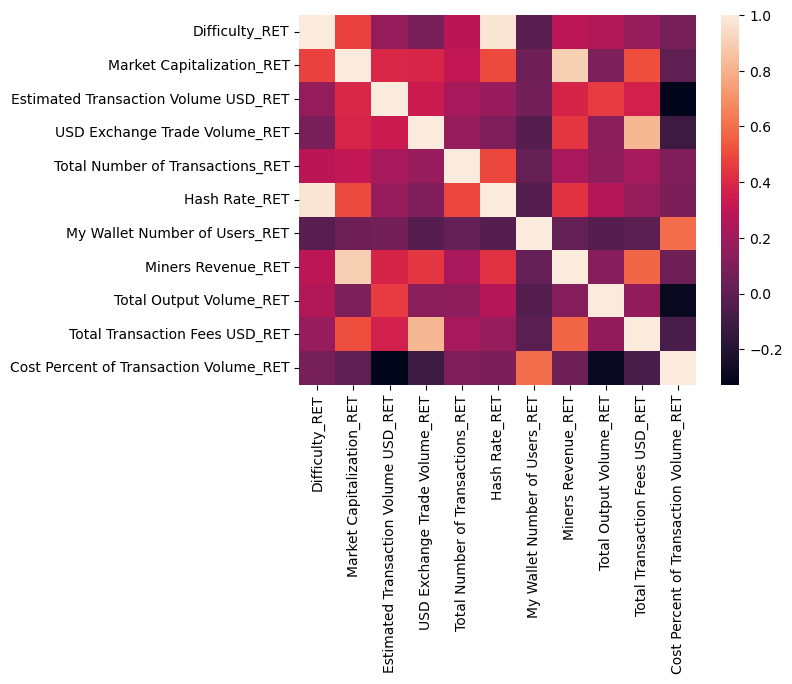

In [73]:
_ = feature_correlation(monthly_bitcoin_df, most_important_features_list)

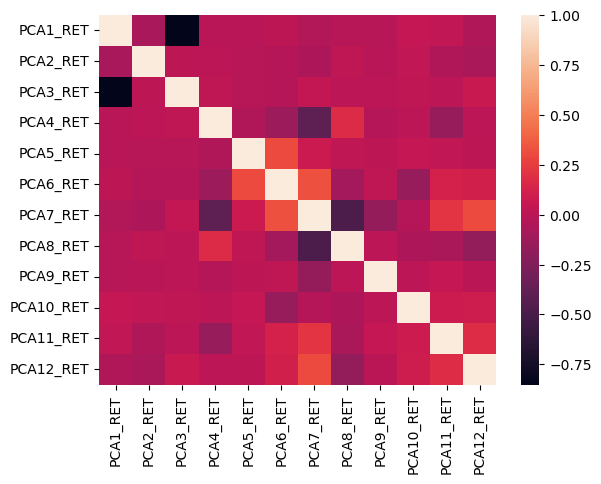

In [74]:
PCA_list = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12']
pct_change_df = feature_correlation(monthly_bitcoin_df, PCA_list)

These heatmaps pretty clearly say that for our feature set, we should use our curated PCAs rather then the primary Eigen values particularly since their degree of correlation is almost all zero which means little to no correlation between these PC vectors.  which for a multivariate time series analysis is exactly what we want.  NO CONFOUNDING VARIABLES!

In [75]:
monthly_pca_bitcoin_df = monthly_bitcoin_df[PCA_list]
monthly_pca_bitcoin_df['Market Price'] = monthly_bitcoin_df.loc[:,'Market Price']

C:\Users\micha\AppData\Local\Temp\ipykernel_27776\203295870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df['Market Price'] = monthly_bitcoin_df.loc[:,'Market Price']


In [76]:
monthly_pca_bitcoin_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Market Price
date,,,,,,,,,,,,,
2009-01-31,-4.311894,-1.941027,0.565633,-0.624664,-0.082270,0.002458,0.245686,0.332645,-0.596459,0.024101,0.338810,-0.197246,0.0
2009-02-28,-4.305432,-1.935971,0.560841,-0.624533,-0.080818,-0.003430,0.245534,0.330761,-0.590856,0.024245,0.331745,-0.193094,0.0
2009-03-31,-4.298641,-1.929858,0.555870,-0.622593,-0.083748,-0.008178,0.244914,0.328785,-0.585899,0.024475,0.324328,-0.188681,0.0
2009-04-30,-4.291903,-1.923502,0.550927,-0.620732,-0.084030,-0.011903,0.243679,0.325225,-0.581295,0.024595,0.316735,-0.184322,0.0
2009-05-31,-4.724830,-3.294112,1.504016,-3.840696,64.677784,0.338447,-3.467730,-0.868214,1.005480,-0.029261,-0.245632,0.111518,0.0


In [77]:
pct_change_df = pd.DataFrame()
for feature in PCA_list:
    pct_change_df[f'{feature}_RET']  = monthly_bitcoin_df[feature].pct_change()

In [78]:
for col in pct_change_df.columns:
    print(f'Autocorrelation for {col} is: {pct_change_df[col]}')

Autocorrelation for PCA1_RET is: date
2009-01-31         NaN
2009-02-28   -0.001499
2009-03-31   -0.001577
2009-04-30   -0.001567
2009-05-31    0.100871
                ...   
2023-12-31    0.454556
2024-01-31   -0.199415
2024-02-29    0.252745
2024-03-31   -0.158165
2024-04-30    0.118616
Freq: M, Name: PCA1_RET, Length: 184, dtype: float64
Autocorrelation for PCA2_RET is: date
2009-01-31         NaN
2009-02-28   -0.002604
2009-03-31   -0.003158
2009-04-30   -0.003294
2009-05-31    0.712560
                ...   
2023-12-31   -0.723025
2024-01-31    3.189300
2024-02-29    0.517368
2024-03-31    0.343781
2024-04-30   -0.157031
Freq: M, Name: PCA2_RET, Length: 184, dtype: float64
Autocorrelation for PCA3_RET is: date
2009-01-31         NaN
2009-02-28   -0.008472
2009-03-31   -0.008864
2009-04-30   -0.008892
2009-05-31    1.729972
                ...   
2023-12-31   -4.201994
2024-01-31   -1.110915
2024-02-29   -9.887594
2024-03-31   -1.083249
2024-04-30   -3.216972
Freq: M, Name: PCA3_R

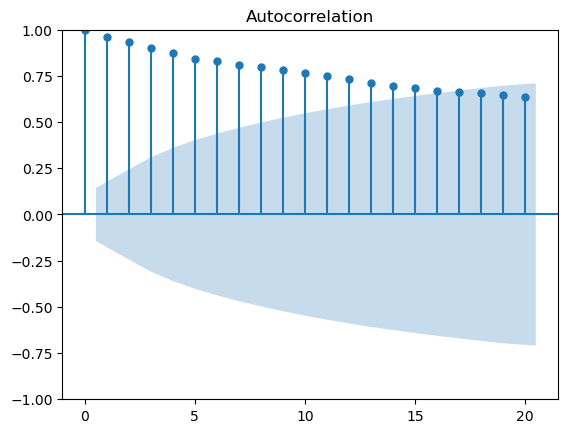

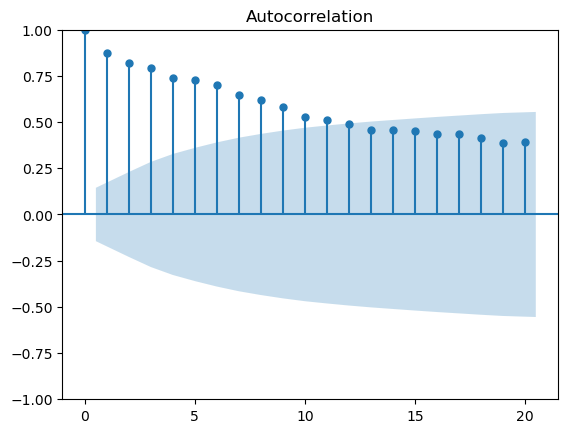

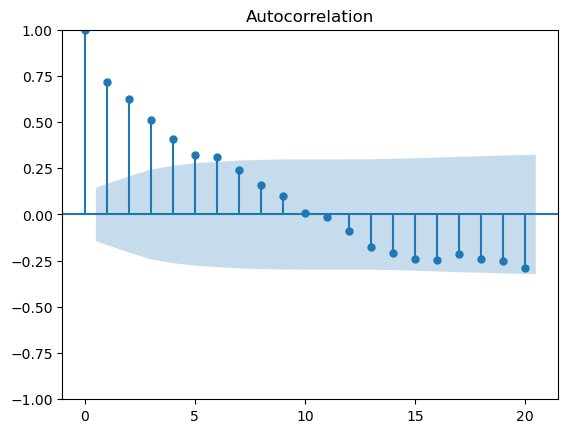

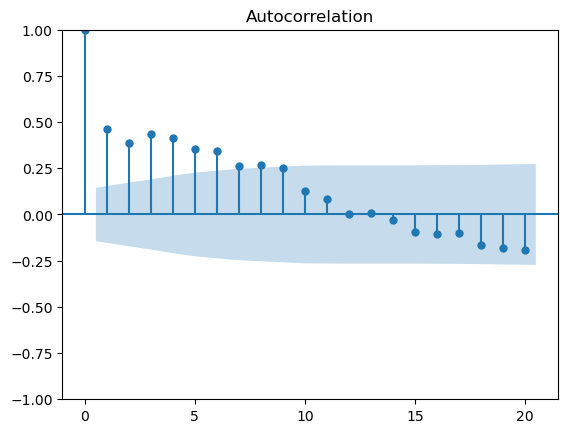

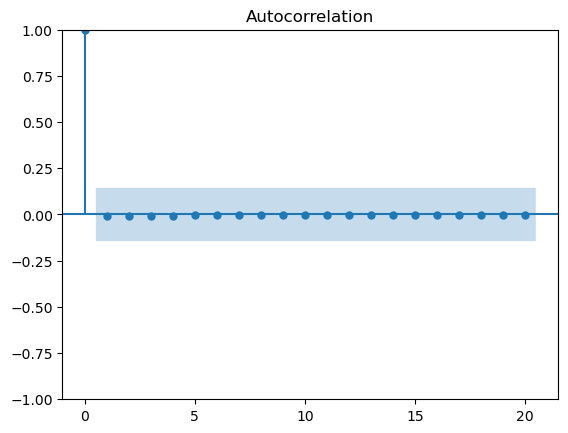

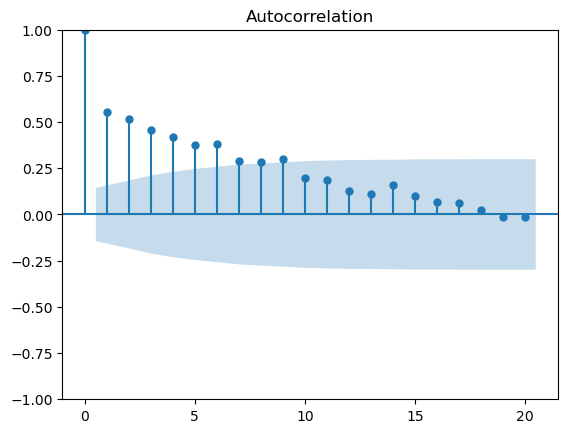

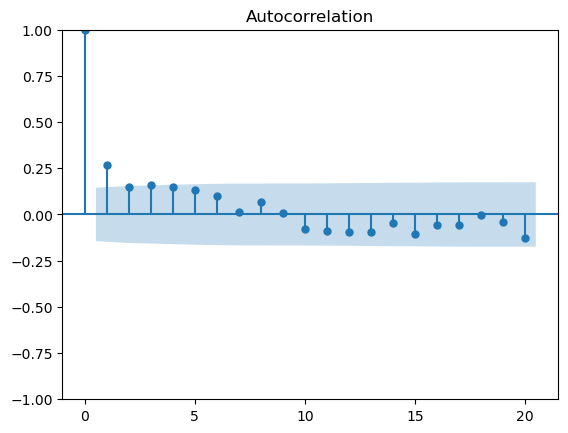

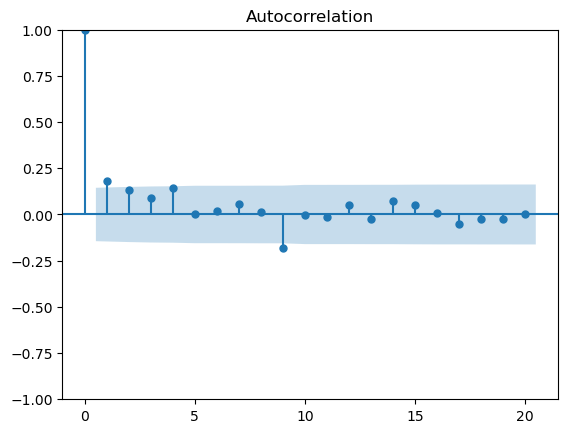

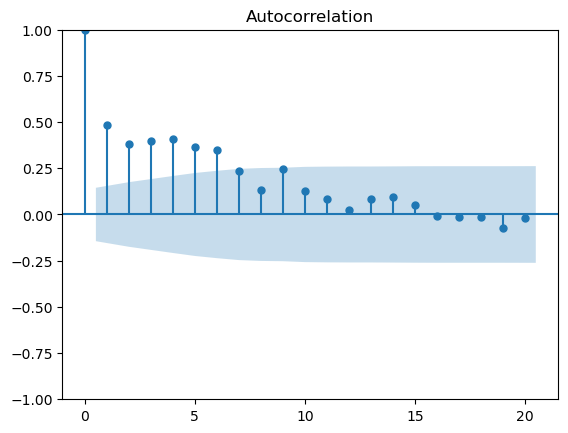

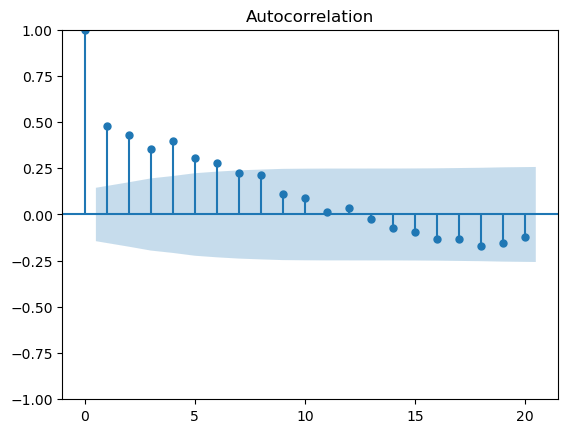

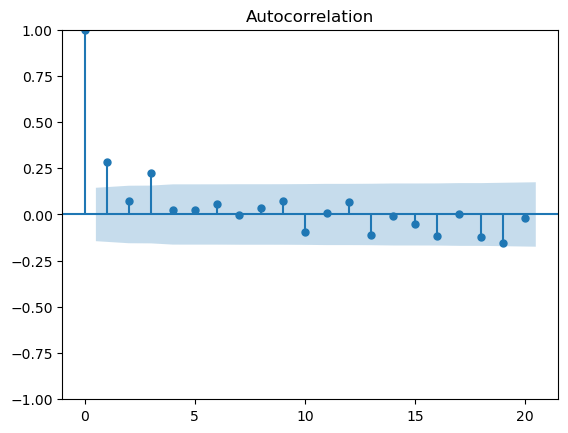

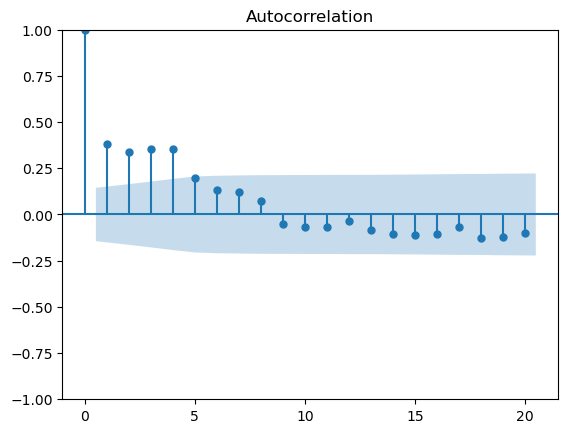

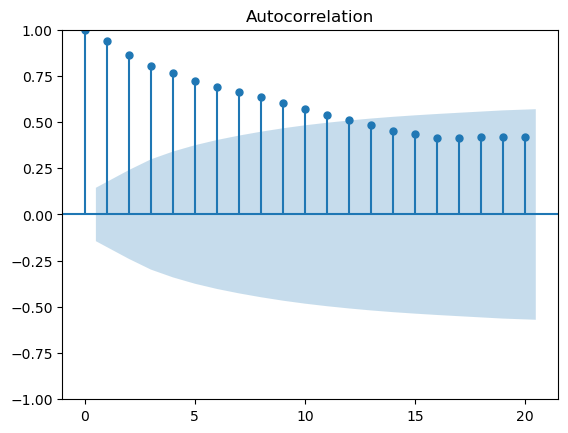

In [82]:
for col in monthly_pca_bitcoin_df.columns:
    plot_acf(monthly_pca_bitcoin_df[col], lags=20, alpha=0.05)

In [84]:
for col in monthly_pca_bitcoin_df.columns:
    results = adfuller(monthly_pca_bitcoin_df[col])
    print(results[1])

0.9944748550606024
0.6517859771979693
0.0013995197695529913
0.004092780530273395
9.140132376773319e-05
0.7336435104690945
7.825905735425065e-07
2.4753876513904543e-20
0.03954767702106017
0.012464863379960804
1.1540659673330123e-05
0.0015688317695837755
0.9193719866523259


As per the adfuller test: PCA's 1, 2, 6, 12 are non-stationary whilst the rest are comfortably below our p-values indicating their usefulness for modeling.